In [8]:
from Data.Preprocessing.preprocess import preprocess
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X, y = preprocess()


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


base_model = RandomForestRegressor(max_depth=105, min_samples_leaf=2, min_samples_split=2,
                      random_state=9, n_jobs=-1)
base_model.fit(x_train, y_train)

/Users/gavinlynch04/PycharmProjects/GreenCardResearch/Data/Preprocessing/preprocess.py:18: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Data Sets/fullData.csv')
/Users/gavinlynch04/PycharmProjects/GreenCardResearch/Data/Preprocessing/preprocess.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JOB_INFO_WORK_STATE'].replace({'MASSACHUSETTES': 'MASSACHUSETTS', 'MH': 'MARSHALL ISLANDS'}, inplace=True)
/Users/gavinlynch04/PycharmProjects/Gree

RandomForestRegressor(max_depth=105, min_samples_leaf=2, n_jobs=-1,
                      random_state=9)

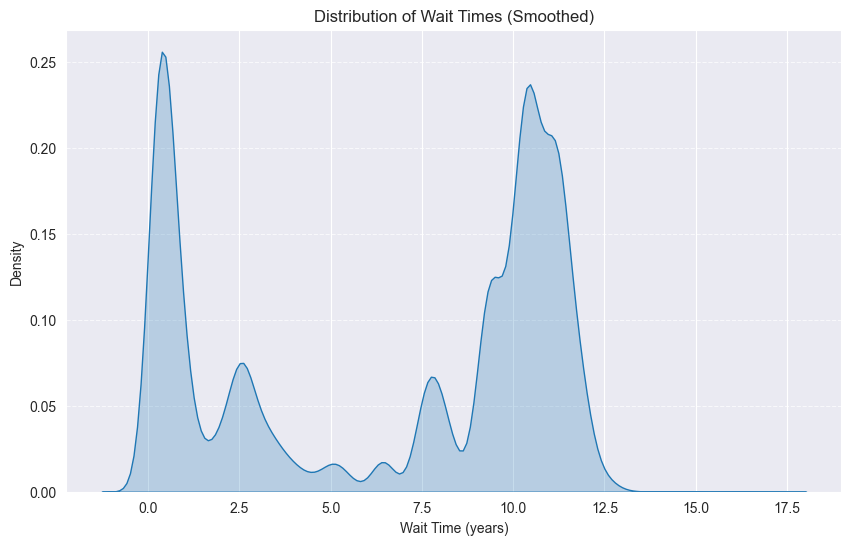

In [3]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=y, fill=True)
plt.title('Distribution of Wait Times (Smoothed)')
plt.xlabel('Wait Time (years)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("./Figures/KDEplot.svg", format="svg")
plt.show()

<Figure size 1000x600 with 0 Axes>

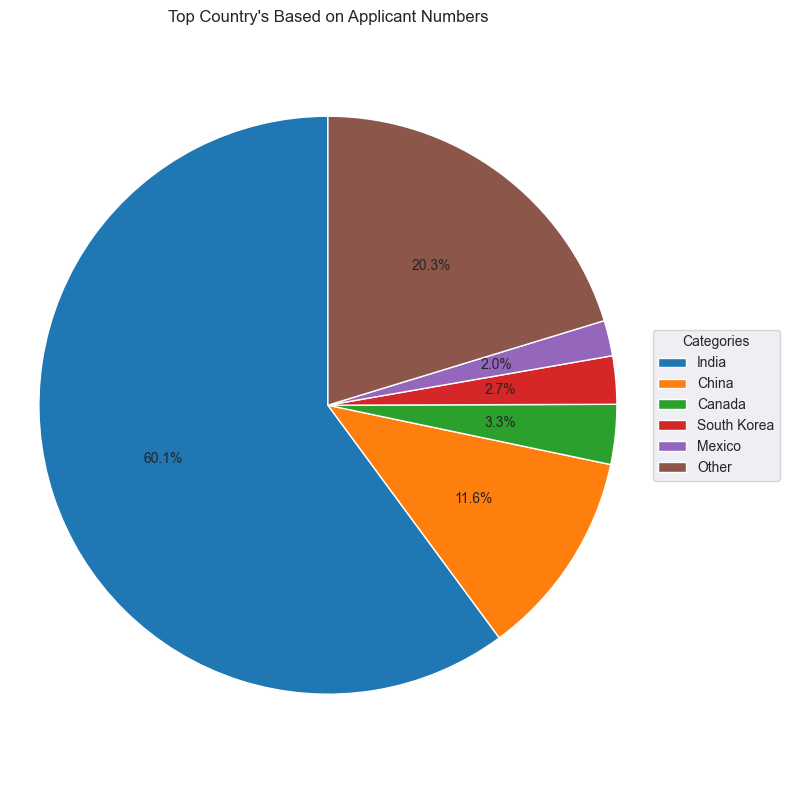

In [46]:
import pandas as pd
import re

plt.figure(figsize=(10, 6))
columns = [column for column in X.columns if "COUNTRY_OF_CITIZENSHIP" in column]
rename_mapping = {}
for original_col in columns:
    temp_name = original_col.replace("COUNTRY_OF_CITIZENSHIP_", "").lower()
    new_name = temp_name.title()
    rename_mapping[original_col] = new_name

country_df = X[columns].rename(columns=rename_mapping)
counts = [country_df[country].value_counts() for country in country_df.columns]
countryDict = {}
for count in counts:
    countryDict[count.index.name] = count[True]

title = "Top Country's Based on Applicant Numbers"
data_series = pd.Series(countryDict)
n = 5
sorted_series = data_series.sort_values(ascending=False)

if len(sorted_series) <= n:
    # If there are N or fewer items, plot them all
    labels = sorted_series.index.tolist()
    sizes = sorted_series.values.tolist()
else:
    # Separate top N and the rest
    top_n = sorted_series.head(n)
    other = sorted_series.iloc[n:]

    # Calculate the sum of the 'Other' category
    other_sum = other.sum()

    # Prepare labels and sizes for the plot
    labels = top_n.index.tolist() + ['Other']
    sizes = top_n.values.tolist() + [other_sum]

# --- Create the Pie Chart ---
fig, ax = plt.subplots(figsize=(8, 8)) # Adjust size as needed

# Use autopct to display percentages on slices
# Use startangle to rotate the start of the pie
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    # textprops=dict(color="w") # Optional: set text color if needed
)

# Add a legend (often better than labels directly on small slices)
ax.legend(
    wedges,
    labels,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) # Position legend outside chart
)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')

plt.title(title)
plt.tight_layout() # Adjust layout to prevent labels overlapping title
plt.savefig("./Figures/pieplot.svg", format="svg")
plt.show()

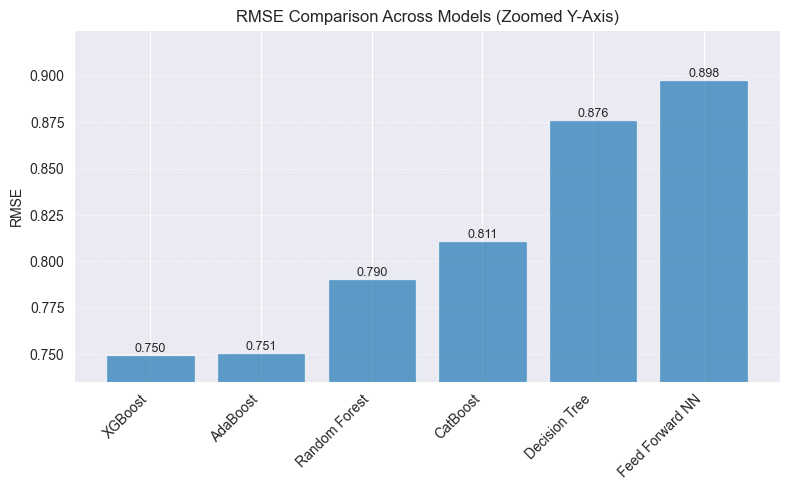

In [54]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'AdaBoost', 'Random Forest', 'CatBoost', 'Decision Tree', 'Feed Forward NN',]
rmse_values = [0.7498, 0.7509, 0.7904, 0.8108, 0.8764, 0.8976]
# Ensure models and rmse_values have the same length (6)

# --- Determine Y-axis limits ---
min_rmse = min(rmse_values)
max_rmse = max(rmse_values)
# Add some padding below the min and above the max
y_lower_limit = min_rmse * 0.98 # Start slightly below the minimum (e.g., 98% of min)
# Or set a fixed lower bound if preferred: y_lower_limit = 0.70
y_upper_limit = max_rmse * 1.03 # Go slightly above the maximum (e.g., 3% higher)
# Or set a fixed upper bound: y_upper_limit = 0.92

# --- Create Plot ---
fig, ax = plt.subplots(figsize=(8, 5)) # Adjust figsize as needed

# Bar positions
x_pos = np.arange(len(models))

# Create bars
bars = ax.bar(x_pos, rmse_values, align='center', alpha=0.7, capsize=5)

# --- Set Y-axis limits ---
# Apply the calculated limits
ax.set_ylim(bottom=y_lower_limit, top=y_upper_limit)
# Or use fixed limits: ax.set_ylim(0.70, 0.92)

# Add labels and title
ax.set_ylabel('RMSE')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha="right") # Rotate labels if needed
ax.set_title('RMSE Comparison Across Models (Zoomed Y-Axis)')
ax.yaxis.grid(True, linestyle='--', alpha=0.6) # Add horizontal grid lines

# Optional: Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             f'{yval:.3f}', # Format to 3 decimal places
             va='bottom', # Place text slightly above the bar
             ha='center',
             fontsize=9) # Adjust fontsize if needed

# Improve layout
plt.tight_layout()

# --- Save the Plot ---
# Use PDF or EPS for best quality in LaTeX
plt.savefig('rmse_comparison_zoomed.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('rmse_comparison_zoomed.eps', format='eps', bbox_inches='tight')
# plt.savefig('rmse_comparison_zoomed.png', format='png', dpi=300, bbox_inches='tight')

plt.show() # Display the plot (optional)


/var/folders/g6/0zwbn3ys1sn1cfb8s33n2nf40000gn/T/ipykernel_15095/1104577895.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


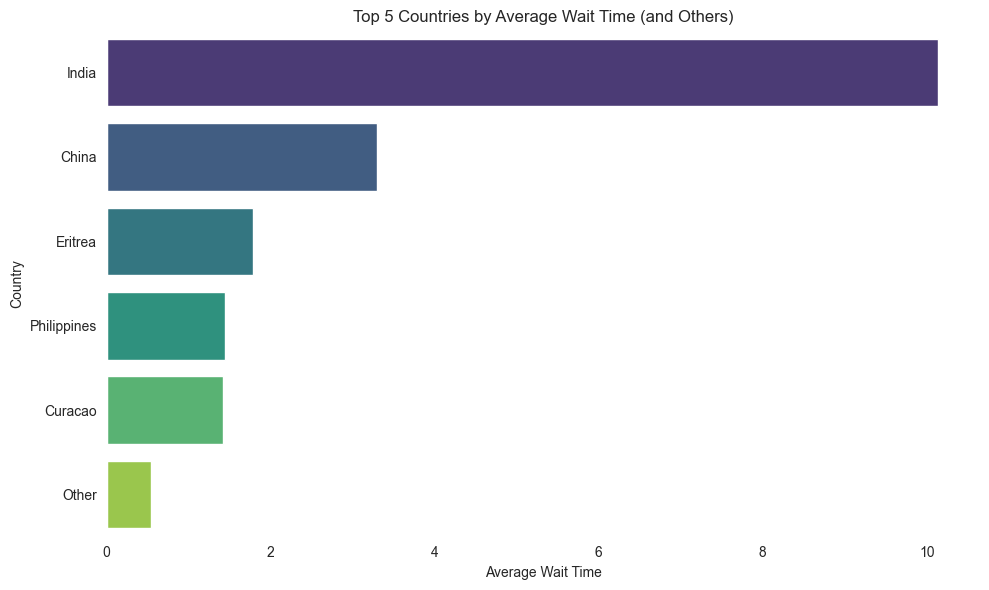

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt
# 1. Identify and rename country columns (your provided code)
columns = [column for column in X.columns if "COUNTRY_OF_CITIZENSHIP" in column]
rename_mapping = {}
for original_col in columns:
    # Use regex to handle potential variations and ensure only country name remains
    match = re.search(r"COUNTRY_OF_CITIZENSHIP_(.*)", original_col)
    if match:
        temp_name = match.group(1).replace("_", " ").lower()
        new_name = temp_name.title()
        rename_mapping[original_col] = new_name

country_df = X[columns].rename(columns=rename_mapping)

# Ensure y is aligned with country_df (important if indices aren't standard)
y = y.loc[country_df.index]

# 2. Calculate average wait time for each country
# We can use matrix multiplication for efficiency:
# Sum of wait times for each country = country_df.T @ y
# Count of entries for each country = country_df.sum()
country_counts = country_df.sum()
# Avoid division by zero for countries with no entries in the sample
valid_countries = country_counts[country_counts > 0].index
country_sums = country_df[valid_countries].T.dot(y)
country_averages = country_sums / country_counts[valid_countries]

# Sort countries by average wait time (descending)
country_averages_sorted = country_averages.sort_values(ascending=False)

# 3. Get Top 5 and calculate "Other" average
top_n = 5
if len(country_averages_sorted) > top_n:
    top_5_countries = country_averages_sorted.head(top_n)
    other_countries = country_averages_sorted.index[top_n:]

    # Find the rows corresponding to "other" countries
    is_other_country = country_df[other_countries].sum(axis=1) >= 1
    # Calculate the average wait time for these "other" rows
    other_average = y[is_other_country].mean()

    # Create the final series for plotting
    plot_data = pd.concat(
        [top_5_countries, pd.Series([other_average], index=["Other"])]
    )
    plot_title = f"Top {top_n} Countries by Average Wait Time (and Others)"
else:
    # Handle cases with 5 or fewer countries
    plot_data = country_averages_sorted
    plot_title = "Average Wait Time by Country"


# 4. Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6), facecolor="none")      # figure bgcolor none
sns.set_style("whitegrid")                                      # or any style you like
ax.set_facecolor("none")                                        # axes (plot area) bgcolor none

sns.barplot(
    x=plot_data.values,
    y=plot_data.index,
    palette="viridis",
    orient="h",
    ax=ax,
)

ax.set_xlabel("Average Wait Time")
ax.set_ylabel("Country")
ax.set_title(plot_title)

plt.tight_layout()

plt.savefig(
    'avgWaits.png',
    format='png',
    transparent=True,
    bbox_inches='tight'
)
plt.show()

Main training pool size: 479824
Final test set size: 119957
Testing training sizes: [ 23991  56550  89110 121669 154229 186788 219348 251907 284467 317026
 349586 382145 414705 447264 479824]
Processing training size: 23991 (1/15)...
  Coverage: 0.805
Processing training size: 56550 (2/15)...
  Coverage: 0.802
Processing training size: 89110 (3/15)...
  Coverage: 0.802
Processing training size: 121669 (4/15)...
  Coverage: 0.804
Processing training size: 154229 (5/15)...
  Coverage: 0.804
Processing training size: 186788 (6/15)...
  Coverage: 0.804
Processing training size: 219348 (7/15)...
  Coverage: 0.803
Processing training size: 251907 (8/15)...
  Coverage: 0.804
Processing training size: 284467 (9/15)...
  Coverage: 0.804
Processing training size: 317026 (10/15)...
  Coverage: 0.803
Processing training size: 349586 (11/15)...
  Coverage: 0.803
Processing training size: 382145 (12/15)...
  Coverage: 0.803
Processing training size: 414705 (13/15)...
  Coverage: 0.803
Processing tra

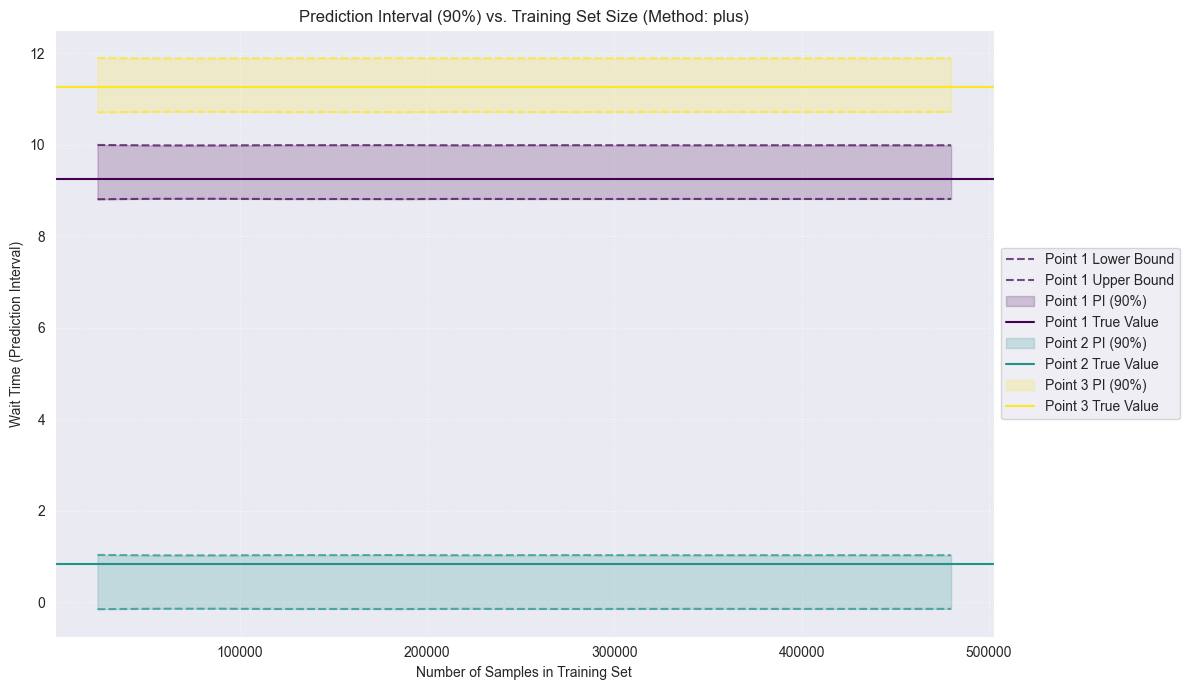

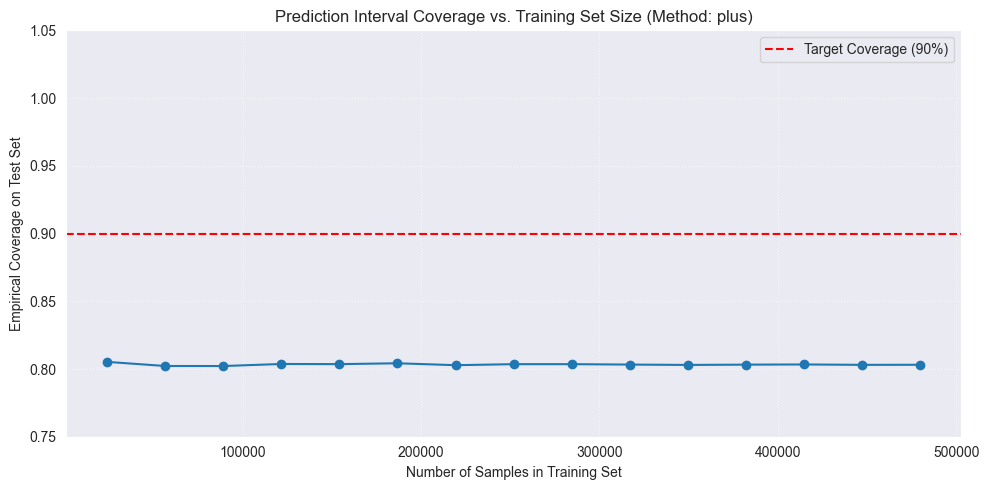


Summary:
Target Coverage: 0.900
Achieved Coverages:
  Train Size 23991: 0.805
  Train Size 56550: 0.802
  Train Size 89110: 0.802
  Train Size 121669: 0.804
  Train Size 154229: 0.804
  Train Size 186788: 0.804
  Train Size 219348: 0.803
  Train Size 251907: 0.804
  Train Size 284467: 0.804
  Train Size 317026: 0.803
  Train Size 349586: 0.803
  Train Size 382145: 0.803
  Train Size 414705: 0.803
  Train Size 447264: 0.803
  Train Size 479824: 0.803


In [23]:
from mapie.metrics import regression_coverage_score
from mapie.regression import MapieRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# MAPIE parameters
ALPHA = 0.1 # Corresponds to 1 - alpha = 90% confidence level
METHOD = "plus" # Options: "naive", "base", "plus", "minmax", "cv", "cv_plus", "cv_minmax", ...
# "cv_plus" is robust but slower. "plus" requires a calibration set split internally.
CV_MAPIE = 5 if "cv" in METHOD else "prefit" # Use integer for CV folds or "prefit"

# Training size parameters
N_TRAIN_SIZES = 15 # How many different training sizes to test
MIN_TRAIN_PROP = 0.05 # Minimum proportion of main training data to use
MAX_TRAIN_PROP = 1.0 # Maximum proportion (use all main training data)

# Visualization: Select a few points from the test set to visualize intervals
N_POINTS_TO_VIZ = 3

# --- 2. Initial Data Split ---
# Split into a main pool for training/calibration and a final test set
X_main, X_test, y_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Main training pool size: {X_main.shape[0]}")
print(f"Final test set size: {X_test.shape[0]}")

# --- 3. Define Training Sizes ---
train_sizes = np.linspace(
    int(MIN_TRAIN_PROP * X_main.shape[0]),
    int(MAX_TRAIN_PROP * X_main.shape[0]),
    N_TRAIN_SIZES,
    dtype=int,
)
# Ensure minimum size is reasonable for the model/CV
train_sizes = np.maximum(train_sizes, 50 if CV_MAPIE == "prefit" else CV_MAPIE * 2)
train_sizes = np.unique(train_sizes) # Avoid duplicates
print(f"Testing training sizes: {train_sizes}")


# --- 4. Select Points for Visualization ---
viz_indices = np.random.choice(X_test.shape[0], N_POINTS_TO_VIZ, replace=False)
X_test_viz = X_test.iloc[viz_indices]
y_test_viz = y_test.iloc[viz_indices]

# --- 5. Iteration and Calculation ---
coverage_scores = []
interval_widths_viz = [] # Store avg width for the visualized points
lower_bounds_viz = [[] for _ in range(N_POINTS_TO_VIZ)]
upper_bounds_viz = [[] for _ in range(N_POINTS_TO_VIZ)]


for i, size in enumerate(train_sizes):
    print(f"Processing training size: {size} ({i+1}/{len(train_sizes)})...")

    # Subsample from the main training pool
    if size == X_main.shape[0]:
        # Use all data if size matches
        X_train_subset, y_train_subset = X_main, y_main
    else:
        # Randomly sample without replacement
        indices = np.random.choice(X_main.shape[0], size, replace=False)
        X_train_subset, y_train_subset = X_main.iloc[indices], y_main.iloc[indices]

    # Instantiate and fit MAPIE
    # Note: If method requires calibration, MapieRegressor handles the split internally
    # unless cv="prefit" and you provide X_calib, y_calib to fit.
    # For simplicity here, we let MAPIE handle internal splitting if needed (e.g., for "plus")
    mapie = MapieRegressor(
        base_model, method=METHOD, cv=CV_MAPIE, n_jobs=-1, verbose=0
    )

    # Fit on the current subset
    mapie.fit(X_train_subset, y_train_subset)

    # Predict intervals on the *entire fixed test set*
    y_pred_test, y_pis_test = mapie.predict(X_test, alpha=ALPHA)
    # y_pis_test shape: (n_samples_test, 2, 1) -> [:, 0, 0] is lower, [:, 1, 0] is upper

    # Calculate coverage on the test set
    coverage = regression_coverage_score(
        y_test, y_pis_test[:, 0, 0], y_pis_test[:, 1, 0]
    )
    coverage_scores.append(coverage)
    print(f"  Coverage: {coverage:.3f}")

    # Get intervals specifically for the visualization points
    y_pred_viz, y_pis_viz = mapie.predict(X_test_viz, alpha=ALPHA)
    avg_width = np.mean(y_pis_viz[:, 1, 0] - y_pis_viz[:, 0, 0])
    interval_widths_viz.append(avg_width)

    # Store bounds for each visualization point
    for j in range(N_POINTS_TO_VIZ):
        lower_bounds_viz[j].append(y_pis_viz[j, 0, 0])
        upper_bounds_viz[j].append(y_pis_viz[j, 1, 0])


# --- 6. Visualization ---

# Plot 1: Prediction Intervals for selected points vs Training Size
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, N_POINTS_TO_VIZ))

for j in range(N_POINTS_TO_VIZ):
    plt.plot(
        train_sizes,
        lower_bounds_viz[j],
        linestyle='--',
        color=colors[j],
        alpha=0.7,
        label=f'Point {j+1} Lower Bound' if j == 0 else None # Avoid duplicate labels
    )
    plt.plot(
        train_sizes,
        upper_bounds_viz[j],
        linestyle='--',
        color=colors[j],
        alpha=0.7,
        label=f'Point {j+1} Upper Bound' if j == 0 else None
    )
    plt.fill_between(
        train_sizes,
        lower_bounds_viz[j],
        upper_bounds_viz[j],
        color=colors[j],
        alpha=0.2,
        label=f'Point {j+1} PI ({1-ALPHA:.0%})'
    )
    # Plot true value as horizontal line
    plt.axhline(
        y=y_test_viz.iloc[j],
        color=colors[j],
        linestyle='-',
        linewidth=1.5,
        label=f'Point {j+1} True Value'
    )


plt.xlabel("Number of Samples in Training Set")
plt.ylabel("Wait Time (Prediction Interval)")
plt.title(f"Prediction Interval ({1-ALPHA:.0%}) vs. Training Set Size (Method: {METHOD})")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


# Plot 2: Coverage vs Training Size
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, coverage_scores, marker='o', linestyle='-')
plt.axhline(
    y=1 - ALPHA, color='r', linestyle='--', label=f'Target Coverage ({1-ALPHA:.0%})'
)
plt.xlabel("Number of Samples in Training Set")
plt.ylabel("Empirical Coverage on Test Set")
plt.title(f"Prediction Interval Coverage vs. Training Set Size (Method: {METHOD})")
plt.ylim([max(0, (1 - ALPHA) - 0.15), min(1.05, (1 - ALPHA) + 0.15)]) # Zoom y-axis around target
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print("\nSummary:")
print(f"Target Coverage: {1-ALPHA:.3f}")
print("Achieved Coverages:")
for size, cov in zip(train_sizes, coverage_scores):
    print(f"  Train Size {size}: {cov:.3f}")

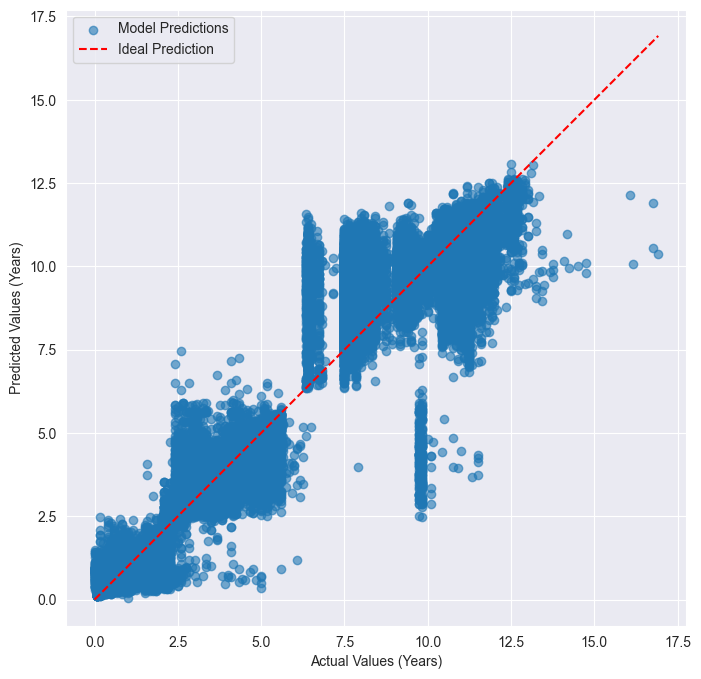

In [14]:
import numpy as np
plt.figure(figsize=(8, 8))

y_pred = base_model.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.6, label="Model Predictions")

min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Values (Years)")
plt.ylabel("Predicted Values (Years)")
plt.legend()
plt.grid(True)

plt.axis('equal')
plt.xlim([min_val - (max_val-min_val)*0.05, max_val + (max_val-min_val)*0.05])
plt.ylim([min_val - (max_val-min_val)*0.05, max_val + (max_val-min_val)*0.05])
plt.savefig(
    'trueVsPredicted.pdf',
    format='pdf',
)
plt.show()

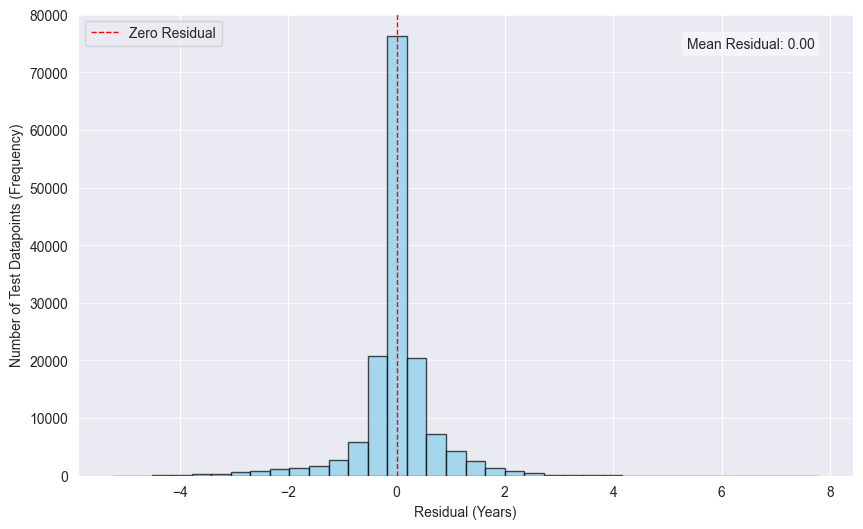


Residual Summary Statistics:
Mean:   0.0010
Median: -0.0065
Std Dev:0.7415
Min:    -5.2309
Max:    7.7758


In [13]:
y_pred = base_model.predict(x_test)

residuals = y_test - y_pred

# --- 2. Plotting Code ---
plt.figure(figsize=(10, 6))

# Create the histogram
# 'bins' controls how many bars are in the histogram. 'auto' is often a good start.
# You can also set it to an integer, e.g., bins=30
plt.hist(residuals, bins=36, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical line at zero to show the center
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Zero Residual')

# Add labels and title
plt.xlabel("Residual (Years)")
plt.ylabel("Number of Test Datapoints (Frequency)")
plt.legend() # Show the legend for the vertical line
plt.grid(axis='y', alpha=0.75) # Add horizontal grid lines for easier frequency reading

# Optional: Add text about the mean residual
mean_residual = np.mean(residuals)
plt.text(
    0.95,
    0.95,
    f"Mean Residual: {mean_residual:.2f}",
    ha='right',
    va='top',
    transform=plt.gca().transAxes, # Position relative to axes
    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5)
)

plt.savefig(
    'residual.svg',
    format='svg',
)
# Display the plot
plt.show()

# --- Optional: Print summary statistics ---
print("\nResidual Summary Statistics:")
print(f"Mean:   {np.mean(residuals):.4f}")
print(f"Median: {np.median(residuals):.4f}")
print(f"Std Dev:{np.std(residuals):.4f}")
print(f"Min:    {np.min(residuals):.4f}")
print(f"Max:    {np.max(residuals):.4f}")